- Librerias a usar para realizar el EDA

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pylab as plt
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import seaborn as sns

                                                                                    EDA - REVIEWS

In [2]:
df_review = pd.read_csv('reviews.csv')

- Informacion

In [3]:
df_review

,user_id,user_url,item_id,posted_date,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,2011-11-05,1,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,2011-07-15,1,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,2011-04-21,1,1
3,js41637,http://steamcommunity.com/id/js41637,251610,2014-06-24,1,1
4,js41637,http://steamcommunity.com/id/js41637,227300,2013-09-08,1,1
...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,70,NaN,1,2
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,362890,NaN,1,1
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,273110,NaN,1,1
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,730,NaN,1,1


In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   user_url            59305 non-null  object
 2   item_id             59305 non-null  int64 
 3   posted_date         49186 non-null  object
 4   recommend           59305 non-null  int64 
 5   sentiment_analysis  59305 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


Se puede ver que hay '59305' archivos que se encuentran en 4 columnas, y las columnas 'recommend' 'sentiment_analysis' fueron creadas para crear las funciones de analisis de sentiemnto. El archvio tiene una dimension de 2.7 MB. 

- Datos faltantes

In [10]:
valores_faltantes_totales = df_review.isna().any().any()
if valores_faltantes_totales:
    print("Hay valores faltantes en el DataFrame.")
else:
    print("No hay valores faltantes en el DataFrame.")

# Para verificar si hay valores faltantes en columnas específicas:
valores_faltantes_columna1 = df_review['user_id'].isna().any()
valores_faltantes_columna2 = df_review['user_url'].isna().any()
valores_faltantes_columna3 = df_review['item_id'].isna().any()
valores_faltantes_columna4 = df_review['posted_date'].isna().any()

if valores_faltantes_columna1:
    print("Hay valores faltantes en 'user_id'.")
else:
    print("No hay valores faltantes en 'user_id'.")

if valores_faltantes_columna2:
    print("Hay valores faltantes en 'user_url'.")
else:
    print("No hay valores faltantes en 'user_url'.")

if valores_faltantes_columna3:
    print("Hay valores faltantes en 'item_id'.")
else:
    print("No hay valores faltantes en 'item_id'.")

if valores_faltantes_columna4:
    print("Hay valores faltantes en 'posted_date'.")
else:
    print("No hay valores faltantes en 'posted_date'.")


Hay valores faltantes en el DataFrame.
No hay valores faltantes en 'user_id'.
No hay valores faltantes en 'user_url'.
No hay valores faltantes en 'item_id'.
Hay valores faltantes en 'posted_date'.


In [11]:
valores_faltantes = df_review.isna().sum().sum()
print("Total de valores faltantes en el DataFrame: ", valores_faltantes)

Total de valores faltantes en el DataFrame:  10119


In [12]:
valores_faltantes_columna4 = df_review['posted_date'].isna().sum()

print("Valores faltantes en 'columna4': ", valores_faltantes_columna4)


Valores faltantes en 'columna4':  10119


   Conclusion faltan : se puede ver que solo faltan '10119' que son de la parte de 'posted_date'

- Datos duplicados

In [13]:
hay_duplicados = df_review.duplicated().any()

if hay_duplicados:
    print("Hay datos duplicados en el DataFrame.")
else:
    print("No hay datos duplicados en el DataFrame.")


Hay datos duplicados en el DataFrame.


In [16]:
hay_duplicados_columna1 = df_review['user_id'].duplicated().any()

if hay_duplicados_columna1:
    print("Hay datos duplicados en 'user_id'.")
else:
    print("No hay datos duplicados en 'user_id'.")

if hay_duplicados_columna1:
    print("Hay datos duplicados en 'user_url'.")
else:
    print("No hay datos duplicados en 'user_url'.")

if hay_duplicados_columna1:
    print("Hay datos duplicados en 'item_id'.")
else:
    print("No hay datos duplicados en 'item_id'.")

if hay_duplicados_columna1:
    print("Hay datos duplicados en 'posted_date'.")
else:
    print("No hay datos duplicados en 'posted_date'.")


Hay datos duplicados en 'user_id'.
Hay datos duplicados en 'user_url'.
Hay datos duplicados en 'item_id'.
Hay datos duplicados en 'posted_date'.


In [87]:
datos_duplicados = df_review.duplicated().sum()
print("Total de datos duplicados en el DataFrame: ", datos_duplicados)

Total de datos duplicados en el DataFrame:  874


In [79]:
datos_duplicados_columna1 = df_review['user_id'].duplicated().sum()
print("Datos duplicados en 'user_id': ", datos_duplicados_columna1)

datos_duplicados_columna2 = df_review['user_url'].duplicated().sum()
print("Datos duplicados en 'user_url': ", datos_duplicados_columna2)

datos_duplicados_columna3 = df_review['item_id'].duplicated().sum()
print("Datos duplicados en 'item_id': ", datos_duplicados_columna3)

datos_duplicados_columna4 = df_review['posted_date'].duplicated().sum()
print("Datos duplicados en 'posted_date': ", datos_duplicados_columna4)


Datos duplicados en 'user_id':  33847
Datos duplicados en 'user_url':  33847
Datos duplicados en 'item_id':  55623
Datos duplicados en 'posted_date':  57660



Conclusion duplicados: faltan en 'user_id':  33847, 'user_url':  33847, 'item_id':  55623,  'posted_date':  57660.

- Datos atipicos

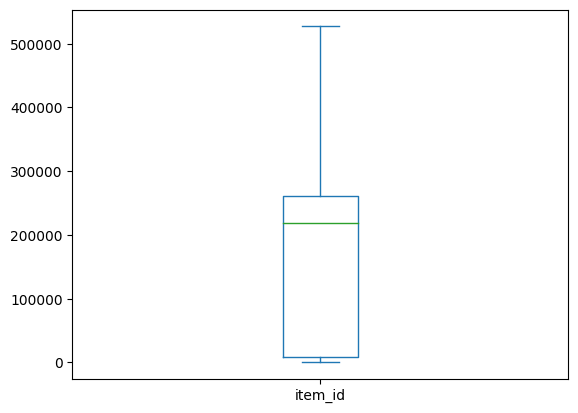

252830.0

In [38]:
df_review['item_id'].plot(kind='box')
plt.show()
# Supongamos que tienes un DataFrame llamado df_reviews y quieres analizar 'columna1'
columna3 = df_review['item_id']
Q1 = columna3.quantile(0.25)
Q3 = columna3.quantile(0.75)
IQR = Q3 - Q1
IQR

Diagrama de Caja (Boxplot):

Un diagrama de caja (boxplot) es una herramienta gráfica que se utiliza para representar la distribución de un conjunto de datos. Está diseñado para mostrar la distribución de los datos, identificar valores atípicos (outliers) y proporcionar una representación visual de medidas estadísticas clave como el rango intercuartil (IQR), los cuartiles, la mediana y los valores extremos.

El diagrama de caja se compone de los siguientes componentes:

- Caja (Box): La caja representa el rango intercuartil (IQR), que es la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3). El IQR contiene la "mayoría" de los datos.

- Línea Central en la Caja: Esta línea representa la mediana del conjunto de datos.

- Bigotes (Whiskers): Los bigotes se extienden desde la caja y muestran la extensión de los datos. A menudo, se utilizan como un indicador visual de la variabilidad de los datos.

El valor que obtuve, '252830.0' , es el resultado del cálculo del rango intercuartil (IQR) 

                                                                                      EDA - STEAM

In [39]:
df_steam= pd.read_csv('steam.csv')

- Informacion

In [41]:
df_steam

,title,url,price,early_access,item_id,developer,Web Publishing,Indie,Education,Animation &amp; Modeling,...,Audio Production,Adventure,Racing,Simulation,Sports,Strategy,Action,Design &amp; Illustration,Free to Play,release_year
0,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,4.99,0,761140,Kotoshiro,0,1,0,0,...,0,0,0,1,0,1,1,0,0,2018.0
1,Ironbound,http://store.steampowered.com/app/643980/Ironb...,0.00,0,643980,Secret Level SRL,0,1,0,0,...,0,0,0,0,0,1,0,0,1,2018.0
2,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,0.00,0,670290,Poolians.com,0,1,0,0,...,0,0,0,1,1,0,0,0,1,2017.0
3,弹炸人2222,http://store.steampowered.com/app/767400/2222/,0.99,0,767400,彼岸领域,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2017.0
4,NaN,http://store.steampowered.com/app/773570/Log_C...,2.99,0,773570,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32128,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,1.99,0,773640,"Nikita ""Ghost_RUS""",0,1,0,0,...,0,0,0,1,0,1,0,0,0,2018.0
32129,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,4.99,0,733530,Sacada,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2018.0
32130,Russian Roads,http://store.steampowered.com/app/610660/Russi...,1.99,0,610660,Laush Dmitriy Sergeevich,0,1,0,0,...,0,0,1,1,0,0,0,0,0,2018.0
32131,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,4.99,0,658870,"xropi,stev3ns",0,1,0,0,...,0,0,0,0,0,0,0,0,0,2017.0


In [42]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      30084 non-null  object 
 1   url                        32133 non-null  object 
 2   price                      30756 non-null  float64
 3   early_access               32133 non-null  int64  
 4   item_id                    32133 non-null  int64  
 5   developer                  28835 non-null  object 
 6   Web Publishing             32133 non-null  int64  
 7   Indie                      32133 non-null  int64  
 8   Education                  32133 non-null  int64  
 9   Animation &amp; Modeling   32133 non-null  int64  
 10  Early Access               32133 non-null  int64  
 11  Photo Editing              32133 non-null  int64  
 12  Utilities                  32133 non-null  int64  
 13  Massively Multiplayer      32133 non-null  int

Es un archivo con una dimension grande de 7.1 MB. Esto se debe a que hay varias columnas que ayudan a la recomendacion de juegos, esto hace que cada genero sea una columna por eso tantas. 

- Datos faltantes

In [44]:
valores_faltantes_totales = df_steam.isna().any().any()
if valores_faltantes_totales:
    print("Hay valores faltantes en el DataFrame.")
else:
    print("No hay valores faltantes en el DataFrame.")

# Para verificar si hay valores faltantes en columnas específicas:
valores_faltantes_columna1 = df_steam['title'].isna().any()
valores_faltantes_columna2 = df_steam['url'].isna().any()
valores_faltantes_columna3 = df_steam['price'].isna().any()
valores_faltantes_columna4 = df_steam['developer'].isna().any()

if valores_faltantes_columna1:
    print("Hay valores faltantes en 'title'.")
else:
    print("No hay valores faltantes en 'title'.")

if valores_faltantes_columna2:
    print("Hay valores faltantes en 'url'.")
else:
    print("No hay valores faltantes en 'url'.")

if valores_faltantes_columna3:
    print("Hay valores faltantes en 'price'.")
else:
    print("No hay valores faltantes en 'price'.")

if valores_faltantes_columna4:
    print("Hay valores faltantes en 'developer'.")
else:
    print("No hay valores faltantes en 'developer'.")

Hay valores faltantes en el DataFrame.
Hay valores faltantes en 'title'.
No hay valores faltantes en 'url'.
Hay valores faltantes en 'price'.
Hay valores faltantes en 'developer'.


In [63]:
valores_faltantes = df_steam.isna().count().sum()
print("Total de valores faltantes en el DataFrame: ", valores_faltantes)

Total de valores faltantes en el DataFrame:  931857


In [64]:
valores_faltantes_columna1 = df_steam['title'].isna().sum()
print("Datos faltantes en 'title': ", valores_faltantes_columna1)

valores_faltantes_columna2 = df_steam['url'].isna().sum()
print("Datos faltantes en 'url': ", valores_faltantes_columna2)

valores_faltantes_columna3 = df_steam['price'].isna().sum()
print("Datos faltantes en 'price': ", valores_faltantes_columna3)

valores_faltantes_columna4 = df_steam['developer'].isna().sum()
print("Datos faltantes en 'developer': ", valores_faltantes_columna4)

Datos faltantes en 'title':  2049
Datos faltantes en 'url':  0
Datos faltantes en 'price':  1377
Datos faltantes en 'developer':  3298


 Conclusion duplicados: la unica compluna que no tiene datos duplicados es 'URL', en total hay '931857' contando las columnas de genero. Las tres columnas importantes falatan '55203' datos, 'title':  2078, 'price':  31985, 'developer':  21140

- Datos duplicadso

In [65]:
hay_duplicados = df_steam.duplicated().any()

if hay_duplicados:
    print("Hay datos duplicados en el DataFrame.")
else:
    print("No hay datos duplicados en el DataFrame.")

No hay datos duplicados en el DataFrame.


Conclusion falantes: No hay datos duplicados en el DataFrame.

- Datos atipicos

Vemos si hay datos atipicos en los precios

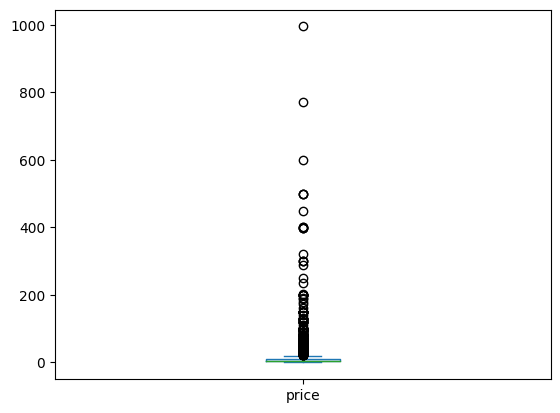

7.0

In [66]:
df_steam['price'].plot(kind='box')
plt.show()
# Supongamos que tienes un DataFrame llamado df_reviews y quieres analizar 'columna1'
columna3 = df_steam['price']
Q1 = columna3.quantile(0.25)
Q3 = columna3.quantile(0.75)
IQR = Q3 - Q1
IQR

Vemos si hay datos atipicos en los años de lanzamineto.

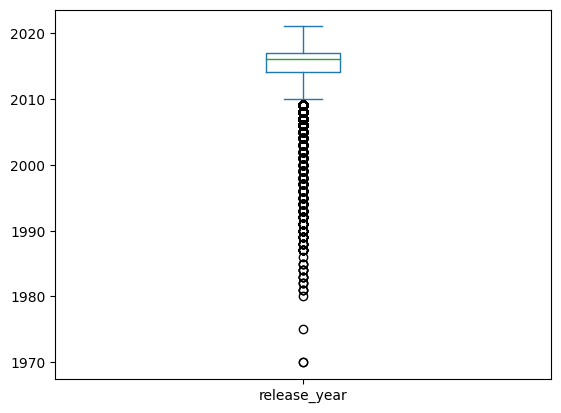

3.0

In [71]:
df_steam['release_year'].plot(kind='box')
plt.show()
# Supongamos que tienes un DataFrame llamado df_reviews y quieres analizar 'columna1'
columna3 = df_steam['release_year']
Q1 = columna3.quantile(0.25)
Q3 = columna3.quantile(0.75)
IQR = Q3 - Q1
IQR

Conclusion atipicos: se analizaron las columnas de los precios y se encontraron 7 valores atipicos. Tambien se analizo los años de lanzamiento y se veo que hay 3 juegos con años atipicos. 

                                                                                           EDA- ITEMS

In [68]:
df_items = pd.read_parquet('items1.parquet')

- Informacion

In [69]:
df_items

,item_id,playtime_forever,user_id
3788771,315670,0,EvEm_Relic
580288,221100,5885,76561198054772649
3778112,219150,141,ramramram
5019097,239160,1123,Elizabeth_007
2190534,40800,114,76561197996613372
...,...,...,...
3509870,358280,0,sythilian
2391237,200510,129,PSDel
4925019,65780,0,ArekkusuRaku
2528404,304050,41,looongboy


In [70]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515321 entries, 3788771 to 5088604
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   item_id           515321 non-null  object
 1   playtime_forever  515321 non-null  int32 
 2   user_id           515321 non-null  object
dtypes: int32(1), object(2)
memory usage: 13.8+ MB


En este archivo tiene la caracteristica de ser el mayor dimension con 13.8 MB. Hay tres columnas que registran '515321'. Este archivo contiene informacion de horas jugadas por usuarios.

- Datos faltantes

In [74]:
valores_faltantes_totales = df_items.isna().any().any()
if valores_faltantes_totales:
    print("Hay valores faltantes en el DataFrame.")
else:
    print("No hay valores faltantes en el DataFrame.")

# Para verificar si hay valores faltantes en columnas específicas:
valores_faltantes_columna1 = df_items['item_id'].isna().any()
valores_faltantes_columna2 = df_items['playtime_forever'].isna().any()
valores_faltantes_columna3 = df_items['user_id'].isna().any()


if valores_faltantes_columna1:
    print("Hay valores faltantes en 'item_id'.")
else:
    print("No hay valores faltantes en 'item_id'.")

if valores_faltantes_columna2:
    print("Hay valores faltantes en 'playtime_forever'.")
else:
    print("No hay valores faltantes en 'playtime_forever'.")

if valores_faltantes_columna3:
    print("Hay valores faltantes en 'user_id'.")
else:
    print("No hay valores faltantes en 'user_id'.")

No hay valores faltantes en el DataFrame.
No hay valores faltantes en 'item_id'.
No hay valores faltantes en 'playtime_forever'.
No hay valores faltantes en 'user_id'.


Conlcusion faltantes: No hay valores faltantes 

- Datos duplicados

In [75]:
hay_duplicados = df_items.duplicated().any()

if hay_duplicados:
    print("Hay datos duplicados en el DataFrame.")
else:
    print("No hay datos duplicados en el DataFrame.")

Hay datos duplicados en el DataFrame.


In [98]:
datos_duplicados = df_items.duplicated().sum()
print("Total de datos duplicados en el DataFrame: ", datos_duplicados)

Total de datos duplicados en el DataFrame:  602


In [95]:
datos_duplicados_columna1 = df_items['item_id'].duplicated().sum()
print("Datos duplicados en 'item_id': ", datos_duplicados_columna1)

datos_duplicados_columna2 = df_items['playtime_forever'].duplicated().sum()
print("Datos duplicados en 'playtime_forever': ", datos_duplicados_columna2)

datos_duplicados_columna3 = df_items['user_id'].duplicated().sum()
print("Datos duplicados en 'user_id': ", datos_duplicados_columna3)

Datos duplicados en 'item_id':  506686
Datos duplicados en 'playtime_forever':  497879
Datos duplicados en 'user_id':  456288


Conclusion duplicados:  hay 'item_id':  506686, en 'playtime_forever':  497879, ultimo 'user_id':  456288.

- Datos atipicos

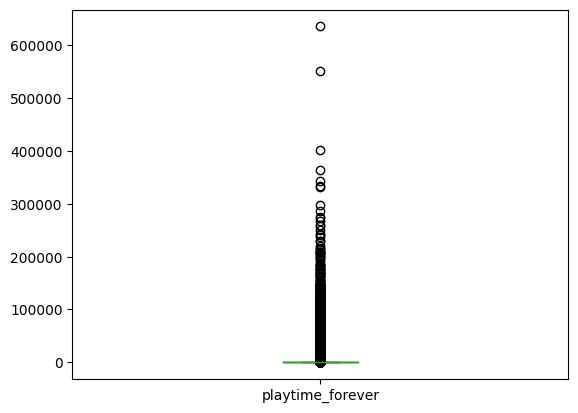

3.0

In [90]:
df_items['playtime_forever'].plot(kind='box')
plt.show()
# Supongamos que tienes un DataFrame llamado df_reviews y quieres analizar 'columna1'
columna2 = df_items['playtime_forever']
Q1 = columna3.quantile(0.25)
Q3 = columna3.quantile(0.75)
IQR = Q3 - Q1
IQR

Conclusion atipicos: solo hay tres juegos con horas atipicas jugadas.

                                                                                       EDA - GENRE

In [100]:
df_genre = pd.read_csv('genre.csv')

- Infromacion


In [101]:
df_genre

,Unnamed: 0,Position,Total_Playtime
0,Action,1,308031425
1,Indie,2,149668460
2,RPG,3,104706002
3,Adventure,4,90976514
4,Simulation,5,87269928
5,Strategy,6,65445185
6,Free to Play,7,60416106
7,Massively Multiplayer,8,44850584
8,Casual,9,26418670
9,Early Access,10,15735597


In [102]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      23 non-null     object
 1   Position        23 non-null     int64 
 2   Total_Playtime  23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 684.0+ bytes


En este archivo vamos a encontras los generos con las posiciones dependiendo de las horas totales jugadas. 

- Datos faltantes

In [103]:
valores_faltantes_totales = df_genre.isna().any().any()
if valores_faltantes_totales:
    print("Hay valores faltantes en el DataFrame.")
else:
    print("No hay valores faltantes en el DataFrame.")

# Para verificar si hay valores faltantes en columnas específicas:
valores_faltantes_columna1 = df_genre['Unnamed: 0'].isna().any()
valores_faltantes_columna2 = df_genre['Position'].isna().any()
valores_faltantes_columna3 = df_genre['Total_Playtime'].isna().any()


if valores_faltantes_columna1:
    print("Hay valores faltantes en 'Unnamed: 0'.")
else:
    print("No hay valores faltantes en 'Unnamed: 0'.")

if valores_faltantes_columna2:
    print("Hay valores faltantes en 'Position'.")
else:
    print("No hay valores faltantes en 'Position'.")

if valores_faltantes_columna3:
    print("Hay valores faltantes en 'Total_Playtime'.")
else:
    print("No hay valores faltantes en 'Total_Playtime'.")

No hay valores faltantes en el DataFrame.
No hay valores faltantes en 'Unnamed: 0'.
No hay valores faltantes en 'Position'.
No hay valores faltantes en 'Total_Playtime'.


Conclusion faltantes: No hay datos faltantes

- Datos duplicados

In [104]:
hay_duplicados = df_genre.duplicated().any()

if hay_duplicados:
    print("Hay datos duplicados en el DataFrame.")
else:
    print("No hay datos duplicados en el DataFrame.")

No hay datos duplicados en el DataFrame.


Conclusion duplicados: No hay datos duplicados

- Datos atipicos

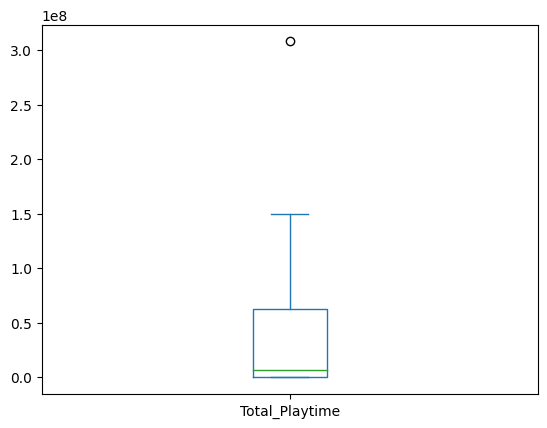

3.0

In [105]:
df_genre['Total_Playtime'].plot(kind='box')
plt.show()
# Supongamos que tienes un DataFrame llamado df_reviews y quieres analizar 'columna1'
columna2 = df_genre['Total_Playtime']
Q1 = columna3.quantile(0.25)
Q3 = columna3.quantile(0.75)
IQR = Q3 - Q1
IQR

Conclusion atipicos: solo hay tres valores atipicos en cantidad de horas jugadas